In [ ]:
#************** Exploration des données ******************************

In [1]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10  #Base de données
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [2]:
# Charger les données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Classes CIFAR-10
cifar10_classes = ["Avion", "Automobile", "Oiseau", "Chat", "Cerf",
                   "Chien", "Grenouille", "Cheval", "Bateau", "Camion"]

# Afficher la forme des ensembles d'entraînement et de test
print("Forme de l'ensemble d'entraînement (images) :", x_train.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Forme de l'ensemble de test (images) :", x_test.shape)
print("Forme de l'ensemble de test (étiquettes) :", y_test.shape)

Forme de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) : (50000, 1)
Forme de l'ensemble de test (images) : (10000, 32, 32, 3)
Forme de l'ensemble de test (étiquettes) : (10000, 1)


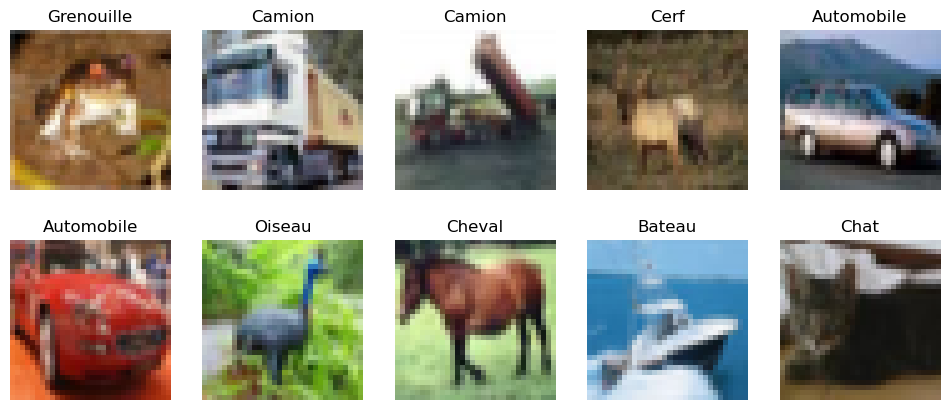

In [4]:
# Afficher quelques exemples d'images et leurs étiquettes
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(cifar10_classes[y_train[i][0]])
    plt.axis('off')
plt.show()

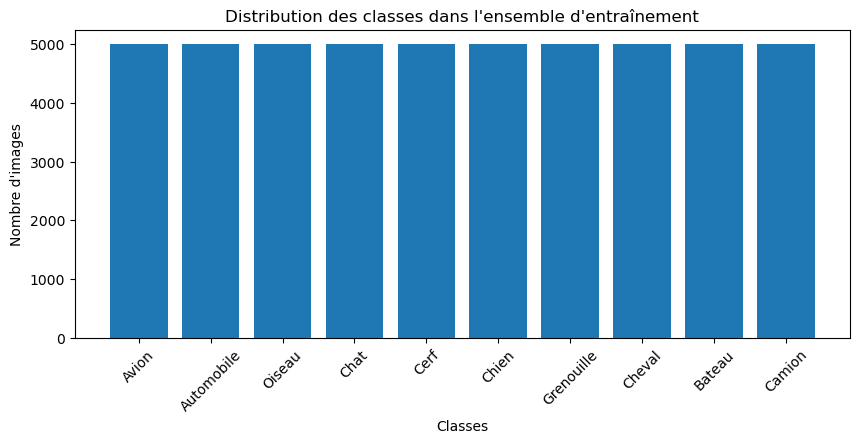

In [5]:
# Afficher la distribution des classes dans l'ensemble d'entraînement
class_distribution = [0] * 10
for label in y_train:
    class_distribution[label[0]] += 1
    
plt.figure(figsize=(10, 4))
plt.bar(cifar10_classes, class_distribution)
plt.title("Distribution des classes dans l'ensemble d'entraînement")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#********************* Prétraitement des données ********************

In [6]:
# Normaliser les pixels des images en mettant à l'échelle entre 0 et 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
# Transformer les étiquettes en vecteurs one-hot (encodage catégoriel)
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
#ici on crée des vecteurs pour chaque classe 

In [8]:
# Afficher les dimensions après le prétraitement
print("Forme de l'ensemble d'entraînement (images) :", x_train.shape)
print("Forme de l'ensemble de test (images) :", x_test.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Forme de l'ensemble de test (étiquettes) :", y_test.shape)

Forme de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Forme de l'ensemble de test (images) : (10000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) : (50000, 10)
Forme de l'ensemble de test (étiquettes) : (10000, 10)


In [ ]:
# ******** Modèle MLP : Construction du modèle
#dans MlP, on a de couches denses , les couches sont entierement connéctées à la couche précédante

In [9]:
# Importer les bibliothèques nécessaires
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers




# Définir le modèle MLP pour la classification d'images
model_mlp = keras.Sequential([
    # Aplatir les images 32x32 en un vecteur 1D 
    layers.Flatten(input_shape=(32, 32, 3)),#3: RVB
    # Ajouter une couche cachée de 128 neurones avec une fonction d'activation ReLU
    layers.Dense(128, activation='relu'),
    # Ajouter la couche de sortie avec 10 neurones (classes CIFAR-10) et une fonction d'activation softmax
    layers.Dense(10, activation='softmax')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_mlp.compile(optimizer='adam', # Utilisation de l'optimiseur Adam
                  loss='categorical_crossentropy', # Fonction de perte pour la classification multiclasse
                  metrics=['accuracy']) # Métrique de précision

In [11]:
# Afficher un résumé du modèle pour obtenir des informations sur les couches et les paramètres
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Entraîner le modèle MLP sur les données d'entraînement
epochs = 100  # Nombre d'époques
batch_size = 32  # Taille du batch

# Utilisation de la validation split (20% des données pour la validation)
historique = model_mlp.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_mlp.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2590 - loss: 2.0822 - val_accuracy: 0.3603 - val_loss: 1.8187
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3706 - loss: 1.7735 - val_accuracy: 0.3824 - val_loss: 1.7803
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3891 - loss: 1.7194 - val_accuracy: 0.3828 - val_loss: 1.7323
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4089 - loss: 1.6699 - val_accuracy: 0.4006 - val_loss: 1.6908
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4168 - loss: 1.6400 - val_accuracy: 0.4093 - val_loss: 1.6700
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4237 - loss: 1.6202 - val_accuracy: 0.4149 - val_loss: 1.6611
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4316 - loss: 1.6005 - val_accuracy: 0.4174 - val_loss: 1.6549
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4381 - loss: 1.5904 - val_accuracy: 0.

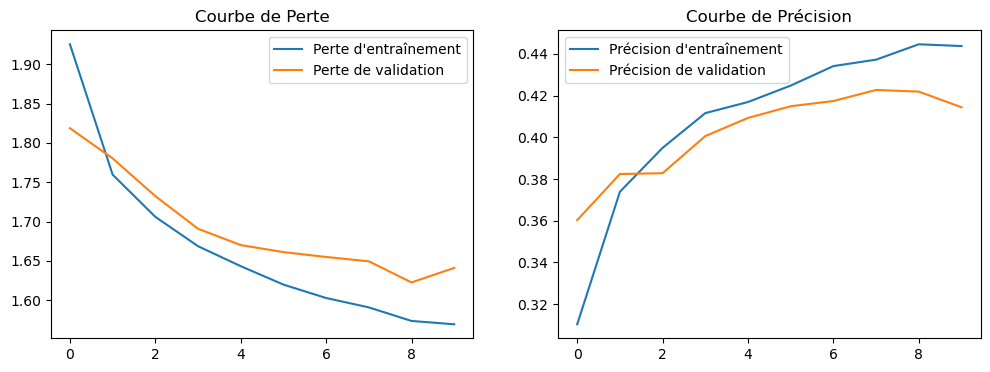

Précision sur les données de test : 42.08%


In [13]:
# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historique.history['loss'], label='Perte d\'entraînement')
plt.plot(historique.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(historique.history['accuracy'], label='Précision d\'entraînement')
plt.plot(historique.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

In [ ]:
#on remarque que la courbe de perte d'entrainement est plus faible que celle de perte de validation et pour la précision 
# meme si on a presque 46% , la courbe de précision d'entrainement est plus élevé que celle de validation

In [14]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_mlp.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


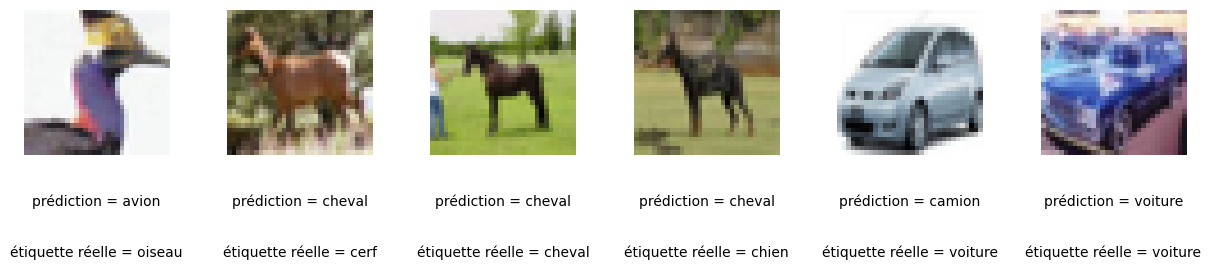

In [15]:
# Nombre d'images à afficher
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
    
# Afficher la figure
plt.show()

In [ ]:
#on remarque , en général , pour les images MPL ça fonctionne pas bien , avec une précision de 42% dans cet exemple n'est pas intéressante

In [ ]:
# ******** CNN *********** Entrainer le modele
#en fait les couches de convolution permettent d'améliorer les perfermances du modele 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
#from tensorflow.keras import layers

In [34]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

In [35]:
# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [36]:
# Entraîner le modèle CNN sur les données d'entraînement
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.2864 - loss: 1.9129 - val_accuracy: 0.4868 - val_loss: 1.4332
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.4720 - loss: 1.4654 - val_accuracy: 0.5390 - val_loss: 1.2961
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5341 - loss: 1.3143 - val_accuracy: 0.6109 - val_loss: 1.1160
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5766 - loss: 1.1975 - val_accuracy: 0.6354 - val_loss: 1.0497
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5998 - loss: 1.1301 - val_accuracy: 0.6477 - val_loss: 1.0165
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.6303 - loss: 1.0555 - val_accuracy: 0.6383 - val_loss: 1.0211
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6416 - loss: 1.0142 - val_accuracy: 0.6646 - val_loss: 0.9685
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.6645 - loss: 0.9575 - 

313/313 - 2s - 5ms/step - accuracy: 0.6722 - loss: 0.9351
Précision sur les données de test : 67.22%


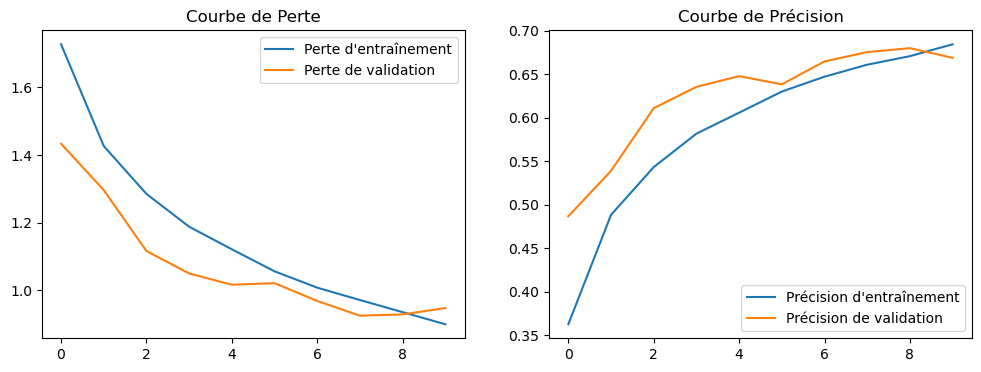

In [37]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Perte d\'entraînement')
plt.plot(history_cnn.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

In [ ]:
#on remarque que les 2 courbes de précision sont proches déja c'est mieux que MLP

In [38]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


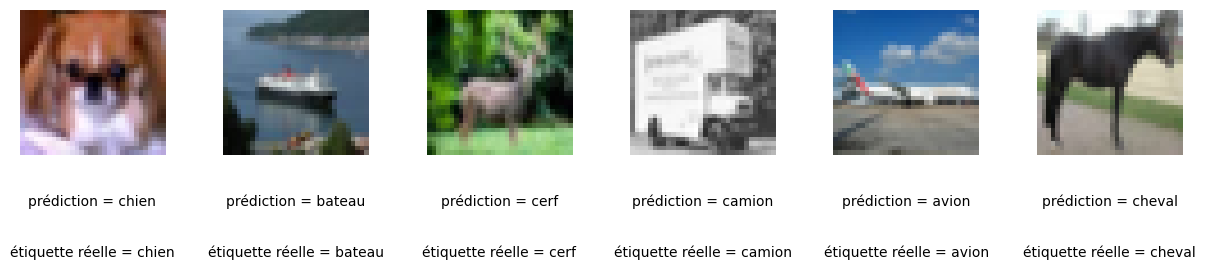

In [39]:
# Nombre d'images à afficher
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
    
# Afficher la figure
plt.show()

In [ ]:
# ********* ici on va essayer avec 4 couches de convolution au lieu de 2 qu'auparavant

In [40]:
# Importer les bibliothèques nécessaires
from tensorflow import keras
from tensorflow.keras import layers, models

# Définir le nombre de classes
NUM_CLASSES = 10

# Créer la structure du modèle CNN avec Batch Normalization en utilisant Sequential()
model_cnn = models.Sequential()

# Couche de convolution 1 : 32 filtres, fenêtre 3x3, activation LeakyReLU, entrée 32x32x3
model_cnn.add(layers.Conv2D(32, (3, 3), strides=1, padding="same", input_shape=(32, 32, 3)))  # Ajouter une parenthèse ici
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 2 : 32 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(32, (3, 3), strides=2, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 3 : 64 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(64, (3, 3), strides=1, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 4 : 64 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(64, (3, 3), strides=2, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Aplatir les données pour les couches entièrement connectées
model_cnn.add(layers.Flatten())   #on applique cela pour passer des couches de convolution à la couche dense
 
# Couche dense 1 : 128 neurones, activation LeakyReLU
model_cnn.add(layers.Dense(128))
model_cnn.add(layers.BatchNormalization()) #pour normaliser les données 
model_cnn.add(layers.LeakyReLU())

# Couche de dropout pour la régularisation
model_cnn.add(layers.Dropout(rate=0.5))

# Couche de sortie : 10 neurones pour les classes, activation softmax
model_cnn.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Afficher un résumé du modèle
model_cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [41]:
# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [42]:
# Entraîner le modèle CNN sur les données d'entraînement
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# on a choisit 20% pour la validation et 80% pour l'entrainement

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 99ms/step - accuracy: 0.3837 - loss: 1.8089 - val_accuracy: 0.5024 - val_loss: 1.4158
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.5658 - loss: 1.2174 - val_accuracy: 0.6001 - val_loss: 1.1447
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.6416 - loss: 1.0204 - val_accuracy: 0.6048 - val_loss: 1.1245
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.6757 - loss: 0.9225 - val_accuracy: 0.5811 - val_loss: 1.2437
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.7067 - loss: 0.8417 - val_accuracy: 0.6546 - val_loss: 1.0418
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.7283 - loss: 0.7760 - val_accuracy: 0.6952 - val_loss: 0.8708
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.7508 - loss: 0.7209 - val_accuracy: 0.6925 - val_loss: 0.8786
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.7623 - loss: 0.6813 -

313/313 - 3s - 11ms/step - accuracy: 0.7034 - loss: 0.8739
Précision sur les données de test : 70.34%


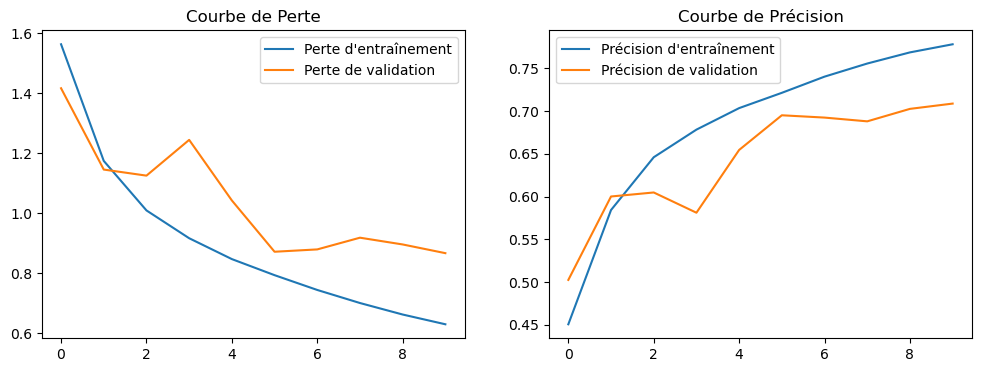

In [44]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Perte d\'entraînement')
plt.plot(history_cnn.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

In [45]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


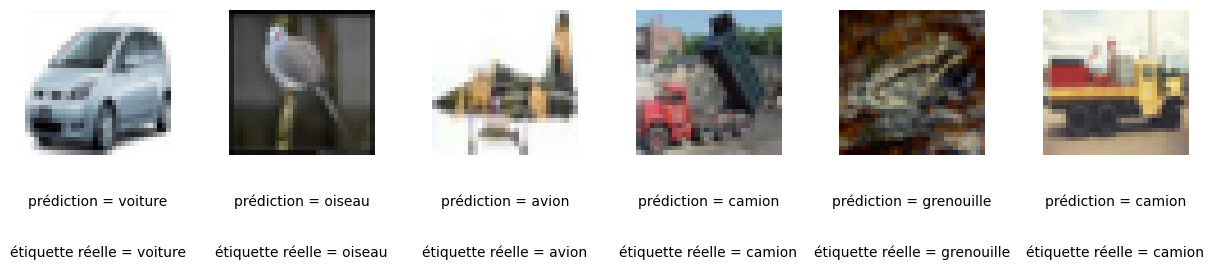

In [47]:
# Nombre d'images à afficher
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
    
# Afficher la figure
plt.show()

In [ ]:
#un modèle pré-entraîné est un modèle qui a déjà appris des caractéristiques et des motifs à partir de données d'apprentissage,
#ce qui lui permet d'être utilisé comme point de départ pour résoudre des tâches spécifiques ou pour être adapté à de nouvelles 
#tâches grâce au transfer learning.

In [ ]:
#transfer learning peut améliorer les performances du modèle et réduire le besoin de grandes quantités de données d'entraînement.

In [ ]:
#Il accélère le processus d'entraînement, car les modèles pré-entraînés sont souvent déjà convergés vers des solutions de haute qualité.

In [ ]:
#Le transfert d'apprentissage est une technique en apprentissage automatique qui consiste à utiliser des modèles déjà entraînés 
#sur des tâches similaires pour résoudre de nouveaux problèmes. Cette approche permet d'économiser du temps et des ressources 
#en capitalisant sur les connaissances préalablement acquises par les modèles pré-entraînés.

In [ ]:
#une liste complète de modèles pré-entraînés en Keras: VGG16 , RESNET50, BERT

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10

In [49]:
# Charger le modèle pré-entraîné VGG16 (sans les couches de classification)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [50]:
# Ajouter des couches personnalisées pour la classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [51]:
# Créer le modèle complet
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Geler les couches du modèle VGG16 pour empêcher leur entraînement
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_transfer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [53]:
# Entraîner le modèle de transfert learning sur les données d'entraînement
epochs = 10
batch_size = 64

history_transfer = model_transfer.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_transfer.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 314s 502ms/step - accuracy: 0.5401 - loss: 1.2980 - val_accuracy: 0.5845 - val_loss: 1.1921
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 274s 438ms/step - accuracy: 0.5721 - loss: 1.2217 - val_accuracy: 0.5897 - val_loss: 1.1792
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 360s 576ms/step - accuracy: 0.5846 - loss: 1.1883 - val_accuracy: 0.5982 - val_loss: 1.1490
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 361s 577ms/step - accuracy: 0.5986 - loss: 1.1454 - val_accuracy: 0.6063 - val_loss: 1.1318
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 297s 475ms/step - accuracy: 0.6022 - loss: 1.1237 - val_accuracy: 0.6065 - val_loss: 1.1296
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 281s 449ms/step - accuracy: 0.6152 - loss: 1.1040 - val_accuracy: 0.6136 - val_loss: 1.1108
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 357s 572ms/step - accuracy: 0.6235 - loss: 1.0775 - val_accuracy: 0.6164 - val_loss: 1.1052
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 304ms/step - accuracy: 0.6296 -

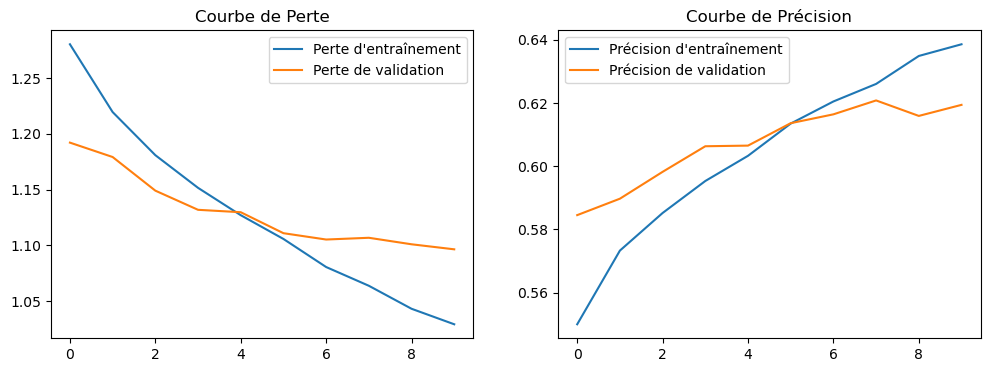

In [54]:
# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['loss'], label='Perte d\'entraînement')
plt.plot(history_transfer.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_transfer.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()